In [122]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from collections import Counter

In [123]:
#Atoms = 54.76E-12*log(( B +NonZeroArray)./(A+NonZeroArray))*2*math.pi/(3*6.084E-13);



In [124]:
import pandas as pd
import numpy as np

def read_matrices(filename, sheet_name='Sheet1'):    #Sheet 1 is the default setting
    # Read only the first few rows where data is expected
    df = pd.read_excel(filename, sheet_name=sheet_name,header=None)

    # Initialize the list to store matrices and the start column index
    matrices = []
    start_col = 0

    # Detect where the columns are completely NaN to find breaks between matrices
    while start_col < df.shape[1]:
        # Ignore initial empty columns if any
        if df.iloc[:, start_col].isna().all():
            start_col += 1
            continue

        # Find the next all-NaN column which signifies the end of a matrix
        end_col = start_col
        while end_col < df.shape[1] and not df.iloc[:, end_col].isna().all():
            end_col += 1

        # Extract the matrix between start_col and end_col, minus one to exclude the NaN column
        matrix_df = df.iloc[:, start_col:end_col].dropna(how='all', axis=1)
        matrices.append(matrix_df.values)  # Convert DataFrame to NumPy array

        # Update start_col to the column after the next NaN column
        start_col = end_col + 1

    return matrices


#Reading Process Example
filename = 'ExtractExcel.xlsx'  # Update with the path to your Excel file
matrices = read_matrices(filename)


A,B,C,D,E,F,G,H= matrices[0],matrices[1],matrices[2],matrices[3],matrices[4],matrices[5],matrices[6],matrices[7]

In [125]:
def extractParameter(matrix):
  return [matrix[0][0],matrix[1][0],matrix[3][0],matrix[2][0]]

initialParameters_H_1= extractParameter(A)
initialParameters_H_2= extractParameter(C)
initialParameters_V_1= extractParameter(E)
initialParameters_V_2= extractParameter(G)      #[amplitude,sigma, background, center]

In [126]:
def filter_nan_row(matrix):
  return matrix[~np.isnan(matrix).any(axis=1)]
B=filter_nan_row(B)
D=filter_nan_row(D)
F=filter_nan_row(F)
H=filter_nan_row(H)


B_x,B_y=B[:,0],B[:,1]
D_x,D_y=D[:,0],D[:,1]
F_x,F_y=F[:,0],F[:,1]
H_x,H_y=H[:,0],H[:,1]
len(F_x)
len(D_x)

137

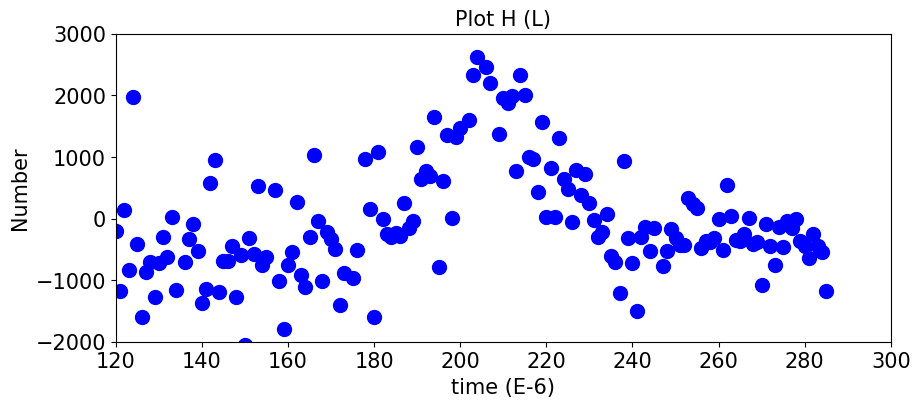

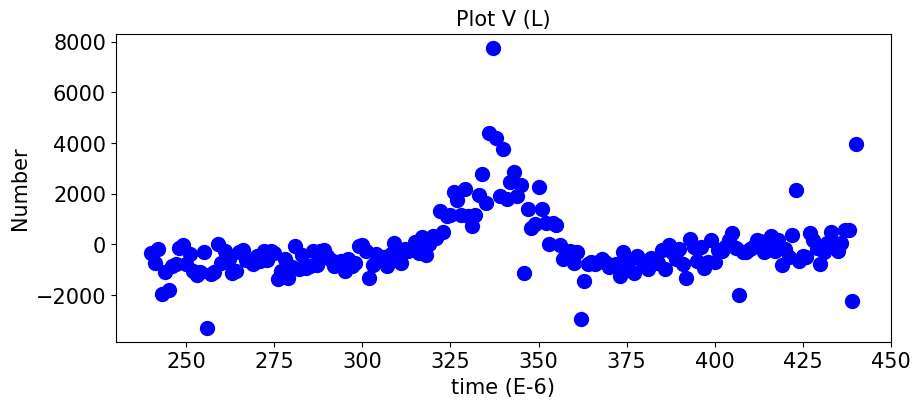

In [127]:
fig1=plt.figure(1,figsize=(10,4))                                             # create new figure for plotting
plt.plot(B_x, B_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot H (L)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlim(120, 300)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig1.show()

fig2=plt.figure(2,figsize=(10,4))                                             # create new figure for plotting
plt.plot(F_x, F_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot V (L)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig2.show()

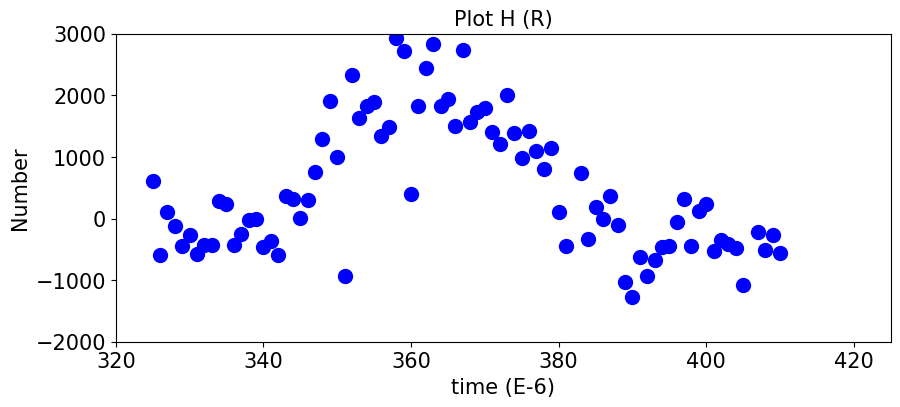

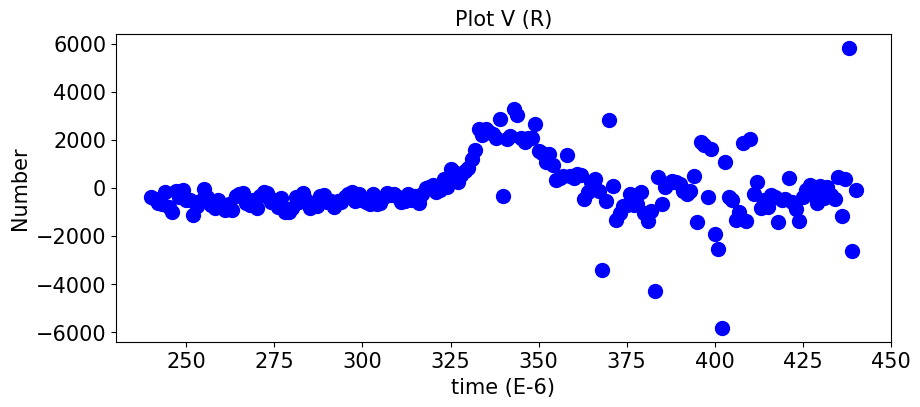

In [128]:
fig3=plt.figure(3,figsize=(10,4))                                             # create new figure for plotting
plt.plot(D_x, D_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot H (R)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlim(320, 425)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig3.show()

fig4=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting
plt.plot(H_x, H_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10)  # make the plot with round markers
plt.title('Plot V (R)', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels
fig4.show()

In [129]:
def yModel(x,amplitude,sigma,background,center):
  #print("This is the input parameter:"+ str(amplitude)+" "+str(sigma)+" "+str(center)+" "+str(background))
  #print("len of data"+str(len(x)))
  return amplitude*np.exp(-0.5*((x-center)/sigma)**2)+background

def analysis(x_data,y_data,iP,type,y_error):
  #print("Proceed 0")
  finalParameters, finalParameterErrors = curve_fit(yModel, x_data, y_data, iP,y_error, True)
  #print("Proceed 1")
  print("This is the data analysis for "+type+" :")
  #print(finalParameters)
  # Extract Fit values and errors for a=y-offset, b=amplitude, and c=x-offset
  amplitude_fit = finalParameters[0]
  amplitude_error_squared = finalParameterErrors[0,0]
  amplitude_error = np.sqrt(amplitude_error_squared)

  sigma_fit = finalParameters[1]
  sigma_error_squared = finalParameterErrors[1,1]
  sigma_error = np.sqrt(sigma_error_squared)

  background_fit = finalParameters[2]
  background_error_squared = finalParameterErrors[2,2]
  background_error = np.sqrt(background_error_squared)

  center_fit = finalParameters[3]
  center_error_squared = finalParameterErrors[3,3]
  center_error = np.sqrt(center_error_squared)
  #print("Proceed 2")
  print("Model parameters:")
  print("amplitude_fit = ", amplitude_fit, "+/-", amplitude_error)
  print("sigma_fit = ", sigma_fit, "+/-", sigma_error)
  print("background_fit = ", background_fit, "+/-", background_error)
  print("center_fit = ", center_fit, "+/-", center_error)
  a_s_covariance_error2 = finalParameterErrors[1,0]
  a_b_covariance_error2 = finalParameterErrors[2,0]
  a_c_covariance_error2 = finalParameterErrors[3,0]
  s_b_covariance_error2 = finalParameterErrors[2,1]
  s_c_covariance_error2 = finalParameterErrors[3,1]
  b_c_covariance_error2 = finalParameterErrors[3,2]
  #print("Proceed 3")
  print("a_s_covariance_error2 =", a_s_covariance_error2)
  print("a_b_covariance_error2 =", a_b_covariance_error2)
  print("a_c_covariance_error2 =", a_c_covariance_error2)
  print("s_b_covariance_error2 =", s_b_covariance_error2)
  print("s_c_covariance_error2 =", s_c_covariance_error2)
  print("b_c_covariance_error2 =", b_c_covariance_error2)
  Atom_Number_Fit = abs(np.sqrt(2 * np.pi) * sigma_fit * amplitude_fit)
  Atom_Number_Fit_Errorbar=np.sqrt(sigma_error_squared*abs(amplitude_fit**2)+amplitude_error_squared*abs(sigma_fit**2)+2*abs(amplitude_fit*sigma_fit)*a_s_covariance_error2)     #Atom num errorbar
  yModel_i = yModel( x_data, amplitude_fit,sigma_fit, background_fit, center_fit)              # Calculate the Y-array (yModel_i) for the values of the fit at the x_data points
  residuals_y = y_data - yModel_i
  std=np.std(residuals_y,ddof=1)
  print("STD: "+str(std))
  if(y_error is None):
      residuals_y_normalized=residuals_y
  else:
       residuals_y_normalized = residuals_y/y_error                          # Calculate the difference between data and model (linear fit), i.e. the residuals
                                                                              # Normalize the residuals to the Y-error on each data point
  #print("Proceed 4")
  Chi_squared = np.sum(residuals_y_normalized**2)             # Calculate the Chi^2 for the data and fit
  DOF = len(y_data)-len(finalParameters)                      # Calculate the degrees of freedom: DOF = number of data points - number of fit parameters
  Reduced_Chi_squared = Chi_squared/DOF
  print("Fit quality")
  print("Reduced Chi^2 =", Reduced_Chi_squared)

  return [amplitude_fit, sigma_fit, background_fit, center_fit, Atom_Number_Fit,Atom_Number_Fit_Errorbar,residuals_y,residuals_y_normalized,std]


In [130]:
#guess the errorbar
H1_guess=analysis(B_x,B_y,initialParameters_H_1,"H_1",None)  #set Errorbar to None right now    #test_errorbar [723.0394092518447 for _ in range(217)]
B_a_guess,B_s_guess,B_b_guess,B_c_guess,Num_1_H_guess,Num_1_H_errorbar_guess,H1_residual_guess,H1_normalized_residual_guess,H1_std_guess=H1_guess[0],H1_guess[1],H1_guess[2],H1_guess[3],H1_guess[4],H1_guess[5],H1_guess[6],H1_guess[7],H1_guess[8]
print("std"+str(H1_std_guess))
print("")
print("")

V1_guess=analysis(F_x,F_y,initialParameters_V_1,"V_1",None)  #set Errorbar to None right now
F_a_guess,F_s_guess,F_b_guess,F_c_guess,Num_1_V_guess,Num_1_V_errorbar_guess,V1_residual_guess,V1_normalized_residual_guess,V1_std_guess=V1_guess[0],V1_guess[1],V1_guess[2],V1_guess[3],V1_guess[4],V1_guess[5],V1_guess[6],V1_guess[7],V1_guess[8]
print("std"+str(V1_std_guess))
print("")
print("")
print("")
H2_guess=analysis(D_x,D_y,initialParameters_H_2,"H_2",None)
D_a_guess,D_s_guess,D_b_guess,D_c_guess,Num_2_H_guess,Num_2_H_errorbar_guess,H2_residual_guess,H2_normalized_residual_guess,H2_std_guess=H2_guess[0],H2_guess[1],H2_guess[2],H2_guess[3],H2_guess[4],H2_guess[5],H2_guess[6],H2_guess[7],H2_guess[8]
print("std"+str(H2_std_guess))
print("")
print("")
V2_guess=analysis(H_x,H_y,initialParameters_V_2,"V_2",None)  #set Errorbar to None right now
H_a_guess,H_s_guess,H_b_guess,H_c_guess,Num_2_V_guess,Num_2_V_errorbar_guess,V2_residual_guess,V2_normalized_residual_guess,V2_std_guess=V2_guess[0],V2_guess[1],V2_guess[2],V2_guess[3],V2_guess[4],V2_guess[5],V2_guess[6],V2_guess[7],V2_guess[8]
print("std"+str(V2_std_guess))

This is the data analysis for H_1 :
Model parameters:
amplitude_fit =  3244.2473760017397 +/- 0.29105376448009074
sigma_fit =  10.367305235053792 +/- 0.0011125765251726383
background_fit =  -591.8995586386968 +/- 0.0785992710990652
center_fit =  206.86776802129705 +/- 0.0010543353546548866
a_s_covariance_error2 = -0.00015416615719502212
a_b_covariance_error2 = -0.0043683963689977534
a_c_covariance_error2 = 5.194569881575005e-11
s_b_covariance_error2 = -2.7922492081347693e-05
s_c_covariance_error2 = -1.6616101360431896e-13
b_c_covariance_error2 = 5.880978532261401e-15
STD: 1121.2086590692907
Fit quality
Reduced Chi^2 = 1274814.6157236742
std1121.2086590692907


This is the data analysis for V_1 :
Model parameters:
amplitude_fit =  3663.2412984307243 +/- 0.31349171938316733
sigma_fit =  8.90557961344514 +/- 0.0009087705438054222
background_fit =  -500.5514940313404 +/- 0.0806758810011419
center_fit =  337.2069052814794 +/- 0.000865400499383072
a_s_covariance_error2 = -0.00013819340634805

In [131]:
H1=analysis(B_x,B_y,initialParameters_H_1,"H_1",[H1_std_guess for _ in range(217)])  #set Errorbar to None right now    #test_errorbar [723.0394092518447 for _ in range(217)]
B_a,B_s,B_b,B_c,Num_1_H,Num_1_H_errorbar,H1_residual,H1_normalized_residual=H1[0],H1[1],H1[2],H1[3],H1[4],H1[5],H1[6],H1[7]
print("")
print("")
print("")

V1=analysis(F_x,F_y,initialParameters_V_1,"V_1",[V1_std_guess for _ in range(201)])
F_a,F_s,F_b,F_c,Num_1_V,Num_1_V_errorbar,V1_residual,V1_normalized_residual=V1[0],V1[1],V1[2],V1[3],V1[4],V1[5],V1[6],V1[7]
print("")
print("")
print("")
H2=analysis(D_x,D_y,initialParameters_H_2,"H_2",[H2_std_guess for _ in range(137)])
D_a,D_s,D_b,D_c,Num_2_H,Num_2_H_errorbar,H2_residual,H2_normalized_residual=H2[0],H2[1],H2[2],H2[3],H2[4],H2[5],H2[6],H2[7]
print("")
print("")
print("")
V2=analysis(H_x,H_y,initialParameters_V_2,"V_2",[V2_std_guess for _ in range(201)])
H_a,H_s,H_b,H_c,Num_2_V,Num_2_V_errorbar,V2_residual,V2_normalized_residual=V2[0],V2[1],V2[2],V2[3],V2[4],V2[5],V2[6],V2[7]

This is the data analysis for H_1 :
Model parameters:
amplitude_fit =  3244.2473787436343 +/- 326.3319998369004
sigma_fit =  10.367305270823863 +/- 1.2474304428564864
background_fit =  -591.8995636479368 +/- 88.12618287576058
center_fit =  206.8677680294986 +/- 1.1821299311084403
a_s_covariance_error2 = -193.80364127450162
a_b_covariance_error2 = -5491.549768045502
a_c_covariance_error2 = 6.523421995205724e-05
s_b_covariance_error2 = -35.10161228366965
s_c_covariance_error2 = -2.0731183968528324e-07
b_c_covariance_error2 = -1.57836051873489e-07
STD: 1121.2086590693327
Fit quality
Reduced Chi^2 = 1.0140845070423299



This is the data analysis for V_1 :
Model parameters:
amplitude_fit =  3663.2413001211994 +/- 252.14844257853358
sigma_fit =  8.905579659844703 +/- 0.7309445880988326
background_fit =  -500.551500621482 +/- 64.88942597043426
center_fit =  337.2069052832607 +/- 0.6960610882053249
a_s_covariance_error2 = -89.4021058500231
a_b_covariance_error2 = -2977.370425336246
a_c_covari

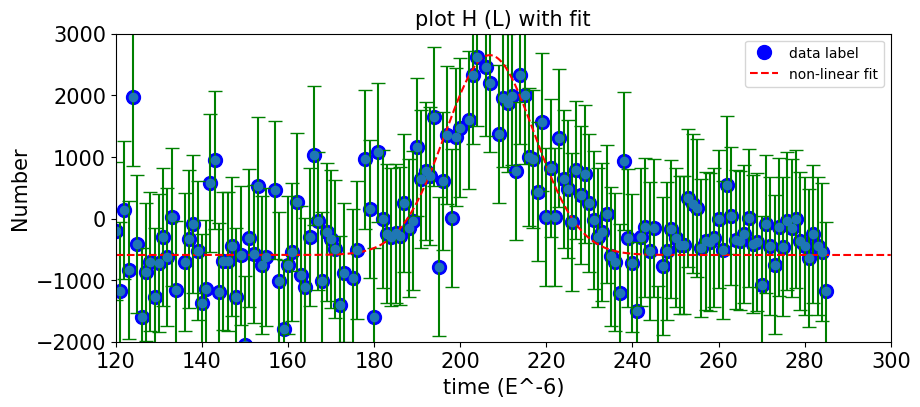

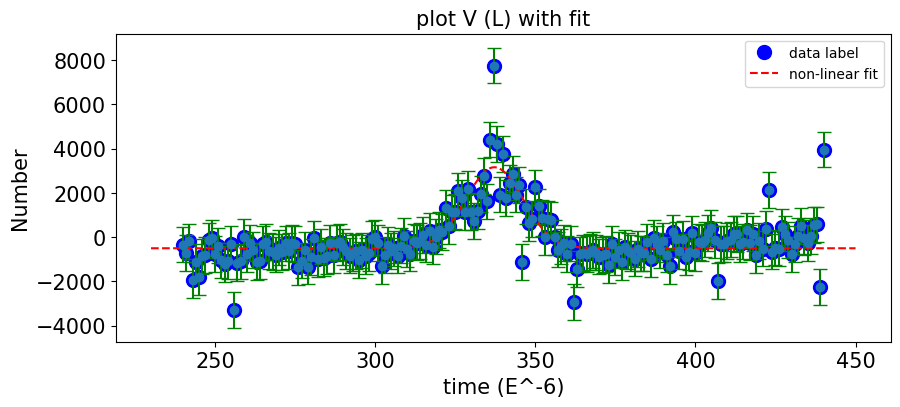

In [132]:
fig5=plt.figure(5,figsize=(10,4))                                             # create new figure for plotting

plt.plot(B_x, B_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot H (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


plt.errorbar(B_x, B_y, [H1_std_guess for _ in range(217)], fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(120,300,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, B_a, B_s, B_b, B_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(120, 300)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3000)
# Add in legend
plt.legend()

plt.show()





fig6=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting

plt.plot(F_x, F_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot V (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


plt.errorbar(F_x, F_y, [V1_std_guess for _ in range(201)], fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(230,450,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, F_a, F_s, F_b, F_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

# Add in legend
plt.legend()

plt.show()

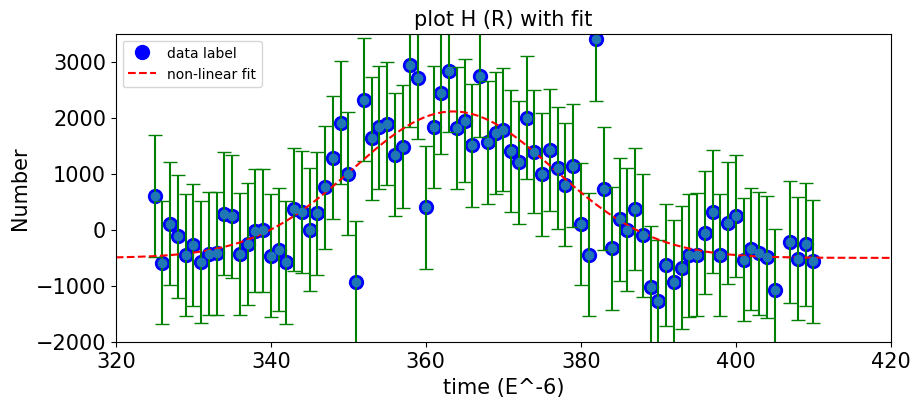

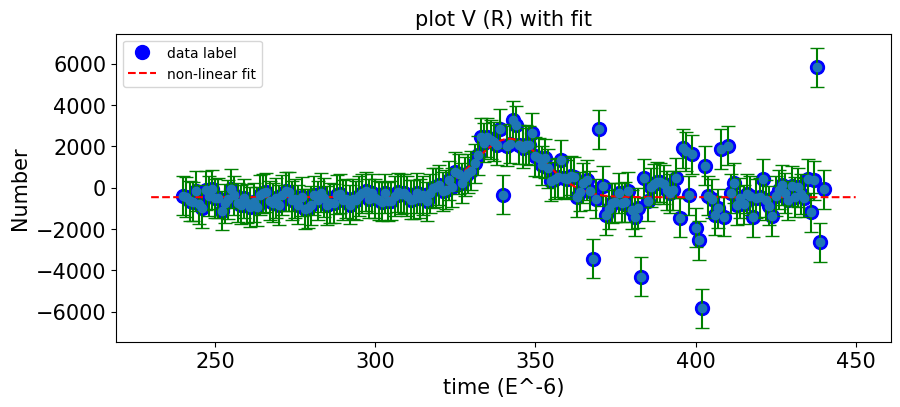

In [133]:
fig7=plt.figure(5,figsize=(10,4))                                             # create new figure for plotting

plt.plot(D_x, D_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot H (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


plt.errorbar(D_x, D_y, [H2_std_guess for _ in range(137)], fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(320,420,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, D_a, D_s, D_b, D_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(320, 420)                                            # Set the range of the plot's x-axis
plt.ylim(-2000, 3500)
# Add in legend
plt.legend()

plt.show()





fig8=plt.figure(4,figsize=(10,4))                                             # create new figure for plotting

plt.plot(H_x, H_y, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot V (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Number', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time (E^-6)', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


plt.errorbar(H_x, H_y, [V2_std_guess for _ in range(201)], fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(230,450,500)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, H_a, H_s, H_b, H_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

# Add in legend
plt.legend()

plt.show()

In [134]:
def categorize_D(data,bin=100):
  bins=[int(x//bin*bin) for x in data]
  distance_counter=Counter(bins)
  actual_D=sorted(distance_counter.keys())
  count=[distance_counter[i] for i in actual_D]


  fig19=plt.figure(figsize=(25,6))
  plt.bar(actual_D,count,width=bin,color='blue',align='edge',alpha=0.7)
  plt.xlabel('Distance (100 bin)')
  plt.ylabel('Count')
  plt.title('Histogram (Residual)')
  plt.xticks(bins,rotation=45)
  plt.grid(True)
  plt.show()

  return actual_D,count

def categorize_D_bin_10(data,bin=10):
  bins=[int(x//bin*bin) for x in data]
  distance_counter=Counter(bins)
  actual_D=sorted(distance_counter.keys())
  count=[distance_counter[i] for i in actual_D]


  fig20=plt.figure(figsize=(200,6))
  plt.bar(actual_D,count,width=bin,color='blue',align='edge',alpha=0.7)
  plt.xlabel('Distance (10 bin)')
  plt.ylabel('Count')
  plt.title('Histogram (Residual)')
  plt.xticks(bins,rotation=45)
  plt.grid(True)
  plt.show()

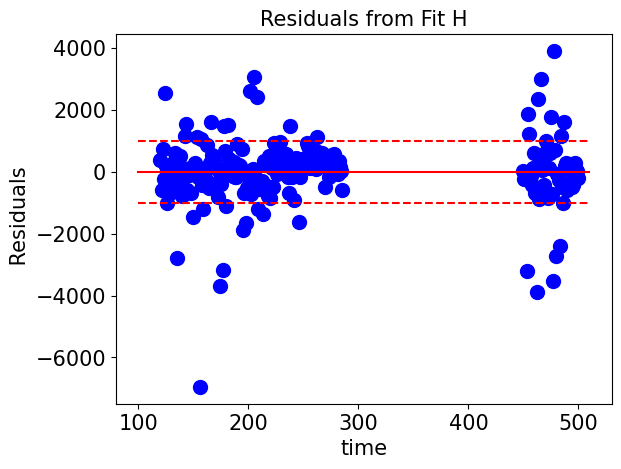

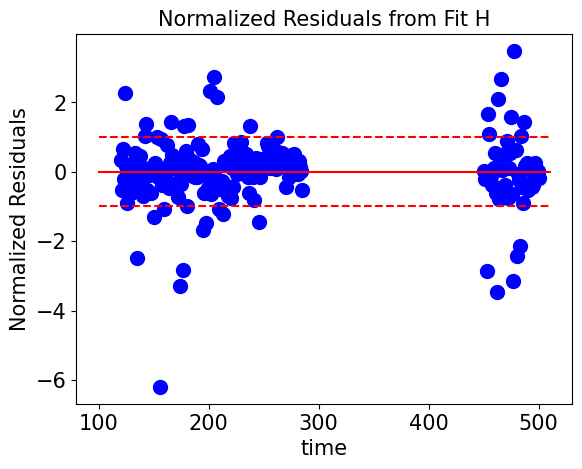

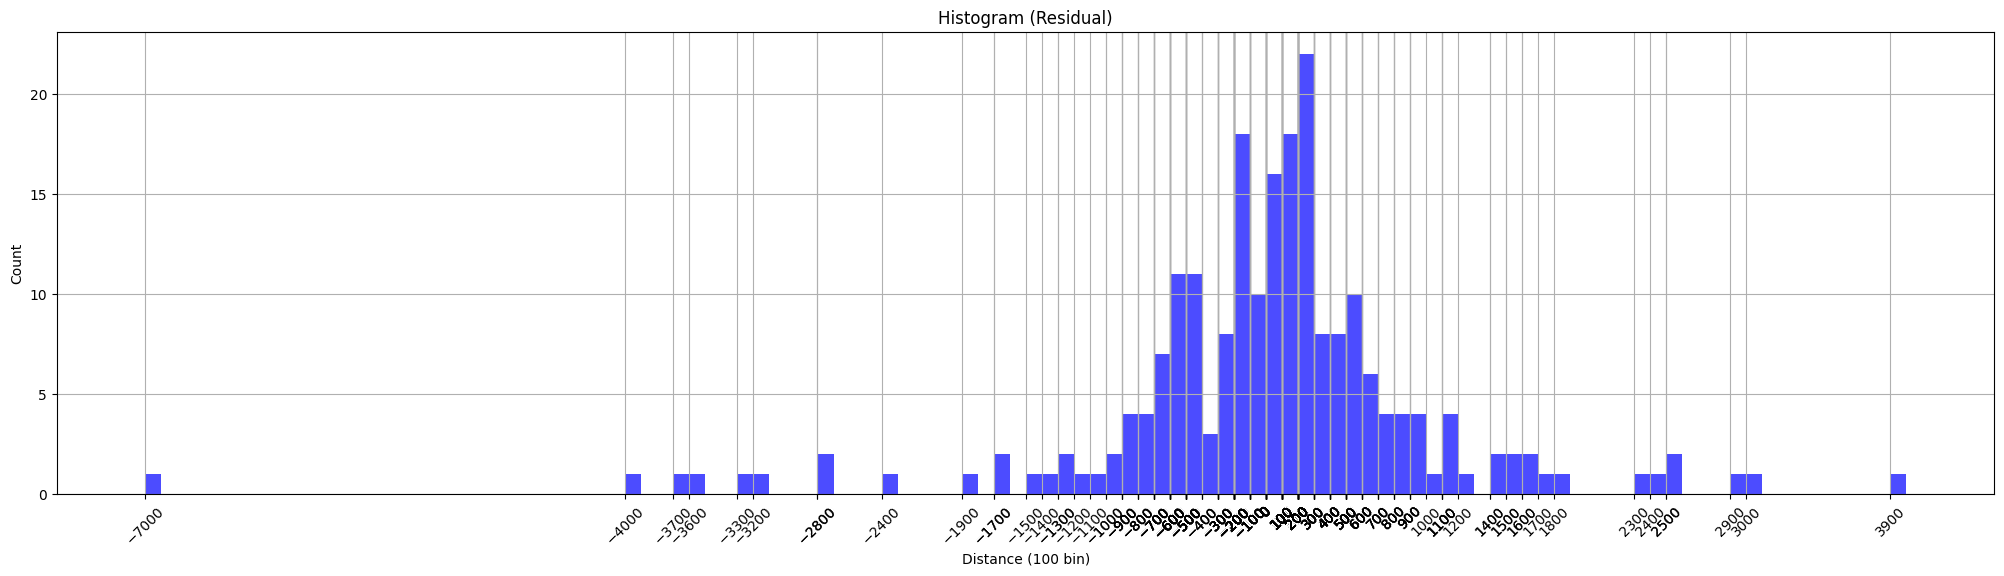

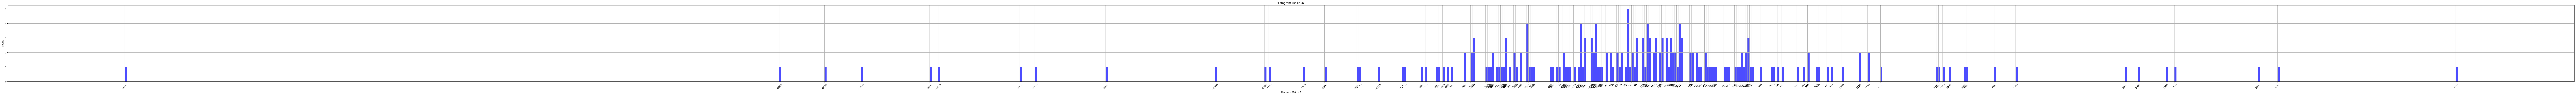

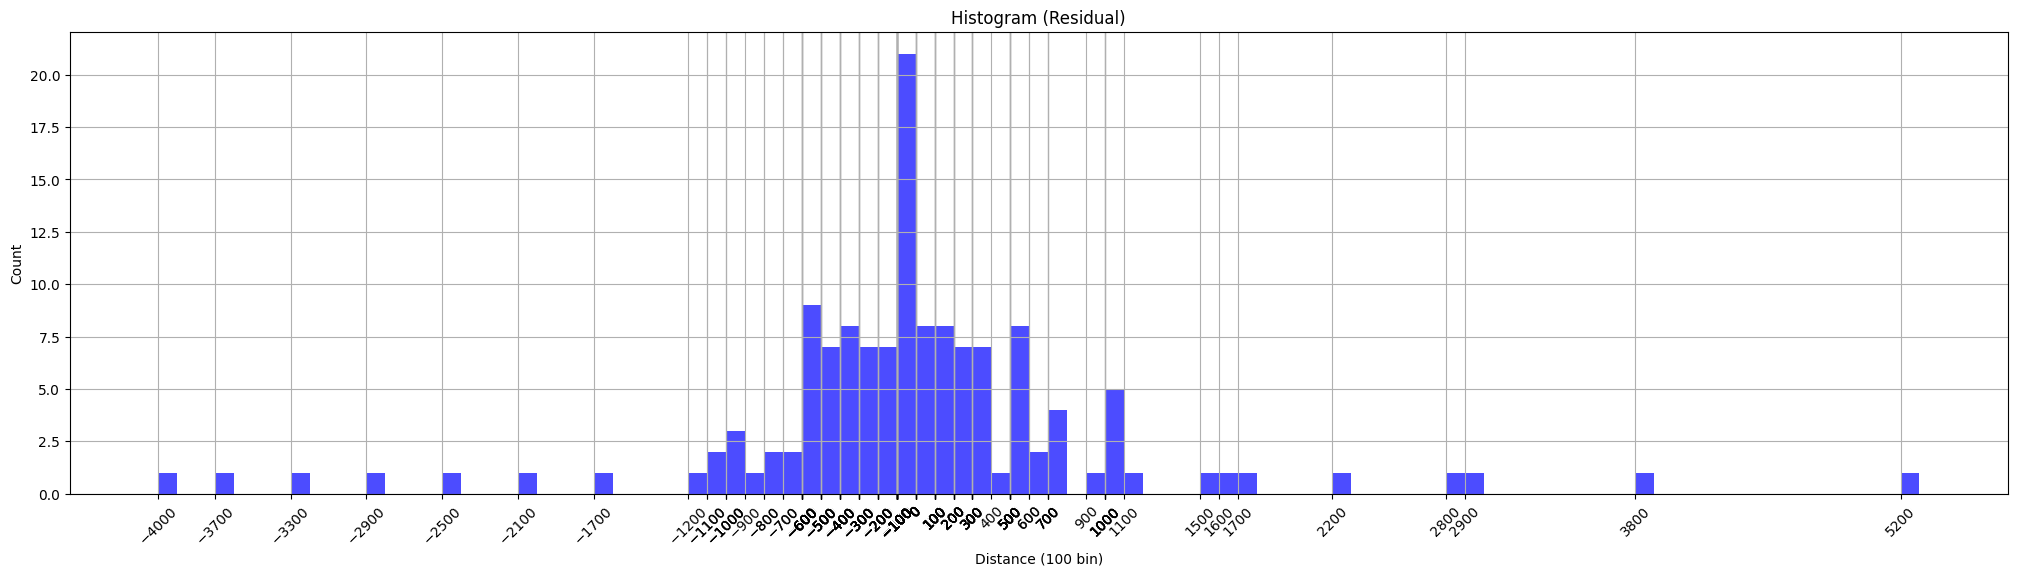

In [135]:
# Plot the normalized residuals from the non-linear fit


fig9=plt.figure(9)                                             # create new figure for plotting

plt.plot(B_x, H1_residual, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('Residuals from Fit H', fontsize=15)                           # Add the plot title

plt.ylabel(' Residuals', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels

#plt.xlim(4.0, 80.0)                                            # Set the range of the plot's x-axis
#plt.ylim(-2.5, 2.5)                                          # Set the range of the plot's y-axis

#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars
x_lines = np.array([100, 510])
y_lines = np.array([1000.0, 1000.0])
plt.plot(x_lines,0.0*y_lines, 'r-')
plt.plot(x_lines,y_lines, 'r--')
plt.plot(x_lines,-y_lines, 'r--')

fig11=plt.figure(11)                                             # create new figure for plotting

plt.plot(B_x, H1_normalized_residual, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('Normalized Residuals from Fit H', fontsize=15)                           # Add the plot title

plt.ylabel('Normalized Residuals', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels

#plt.xlim(4.0, 80.0)                                            # Set the range of the plot's x-axis
#plt.ylim(-2.5, 2.5)                                          # Set the range of the plot's y-axis

#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars
x_lines = np.array([100, 510])
y_lines = np.array([1.0, 1.0])
plt.plot(x_lines,0.0*y_lines, 'r-')
plt.plot(x_lines,y_lines, 'r--')
plt.plot(x_lines,-y_lines, 'r--')

residual_X_H,residual_Y_H=categorize_D(H1_residual)
categorize_D_bin_10(H1_residual)

residual_X_H_2,residual_Y_H_2=categorize_D(H2_residual)

This is the data analysis for H_Residual :
Model parameters:
amplitude_fit =  14.088096998997278 +/- 0.46557746516097837
sigma_fit =  429.2435822124131 +/- 17.66880679675541
background_fit =  1.3386865570794468 +/- 0.19424453581395346
center_fit =  17.120401236050558 +/- 15.624556626823985
a_s_covariance_error2 = -2.8666352895506546
a_b_covariance_error2 = -0.027113081889711385
a_c_covariance_error2 = -0.008688186646610047
s_b_covariance_error2 = -1.5961798415812374
s_c_covariance_error2 = -0.11934967837205802
b_c_covariance_error2 = 0.00782877991788391
STD: 2.335531268031852
Fit quality
Reduced Chi^2 = 5.8183533908847656


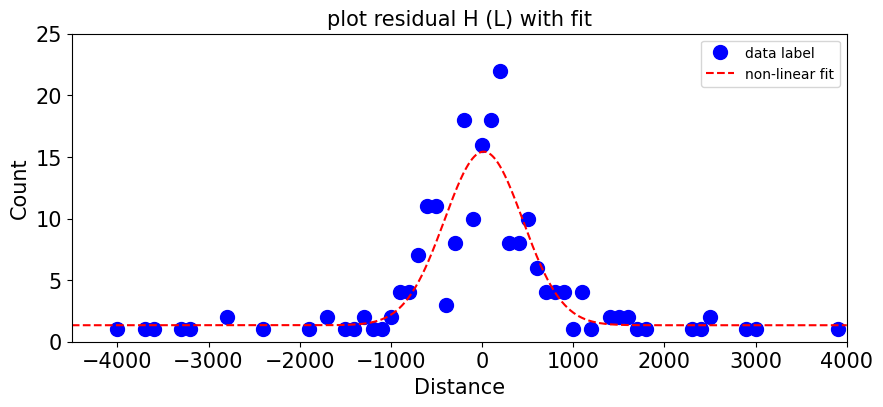

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


This is the data analysis for H_Residual_2 :
Model parameters:
amplitude_fit =  9.135228748177434 +/- inf
sigma_fit =  413.76065371330776 +/- inf
background_fit =  1.1581791667021908 +/- inf
center_fit =  -5.4516204770154294e-08 +/- inf
a_s_covariance_error2 = inf
a_b_covariance_error2 = inf
a_c_covariance_error2 = inf
s_b_covariance_error2 = inf
s_c_covariance_error2 = inf
b_c_covariance_error2 = inf
STD: 2.507446979302857
Fit quality
Reduced Chi^2 = 6.842051267604582


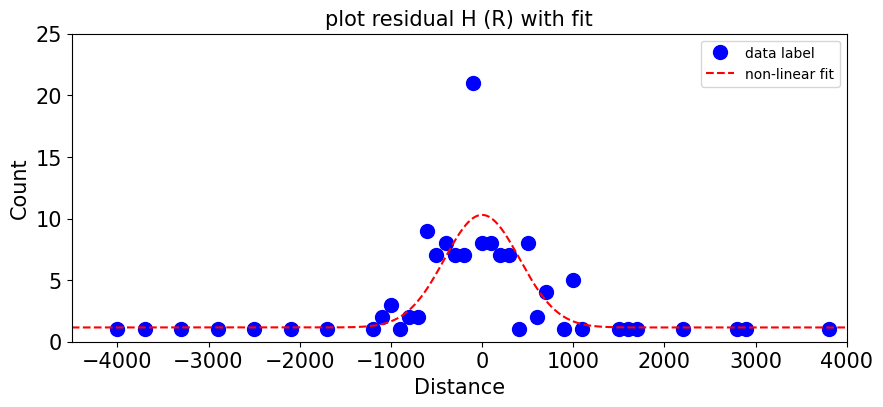

In [136]:
H_Residual=analysis(residual_X_H,residual_Y_H,[23,20,0,0],"H_Residual",None)
H_Residual_a,H_Residual_s,H_Residual_b,H_Residual_c=H_Residual[0],H_Residual[1],H_Residual[2],H_Residual[3]

fig9=plt.figure(9,figsize=(10,4))                                             # create new figure for plotting

plt.plot(residual_X_H,residual_Y_H, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot residual H (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Count', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('Distance', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(D_x, D_y, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(-4500,4000,10000)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, H_Residual_a,H_Residual_s,H_Residual_b,H_Residual_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(-4500, 4000)                                            # Set the range of the plot's x-axis
plt.ylim(0, 25)
# Add in legend
plt.legend()

plt.show()

H_Residual_2=analysis(residual_X_H_2,residual_Y_H_2,[10,15,0,0],"H_Residual_2",None)
H_Residual_a_2,H_Residual_s_2,H_Residual_b_2,H_Residual_c_2=H_Residual_2[0],H_Residual_2[1],H_Residual_2[2],H_Residual_2[3]

fig9=plt.figure(9,figsize=(10,4))                                             # create new figure for plotting

plt.plot(residual_X_H_2,residual_Y_H_2, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot residual H (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Count', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('Distance', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(D_x, D_y, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(-4500,4000,10000)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, H_Residual_a_2,H_Residual_s_2,H_Residual_b_2,H_Residual_c_2)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(-4500, 4000)                                            # Set the range of the plot's x-axis
plt.ylim(0, 25)
# Add in legend
plt.legend()

plt.show()

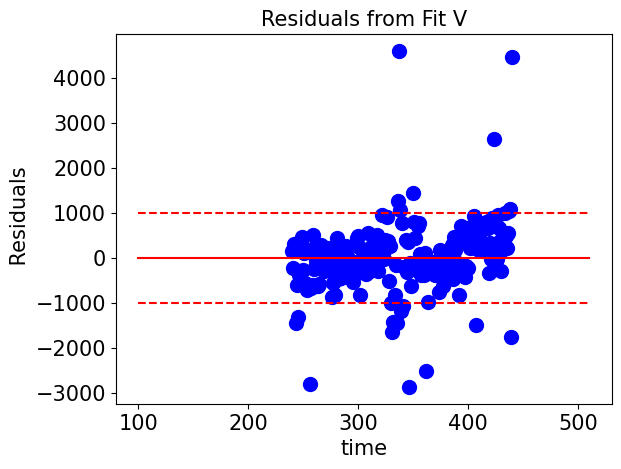

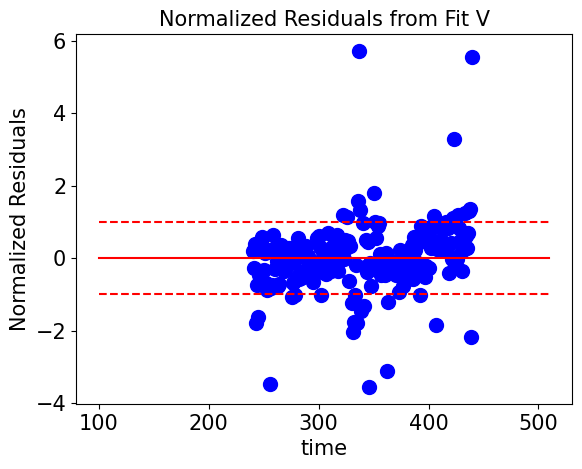

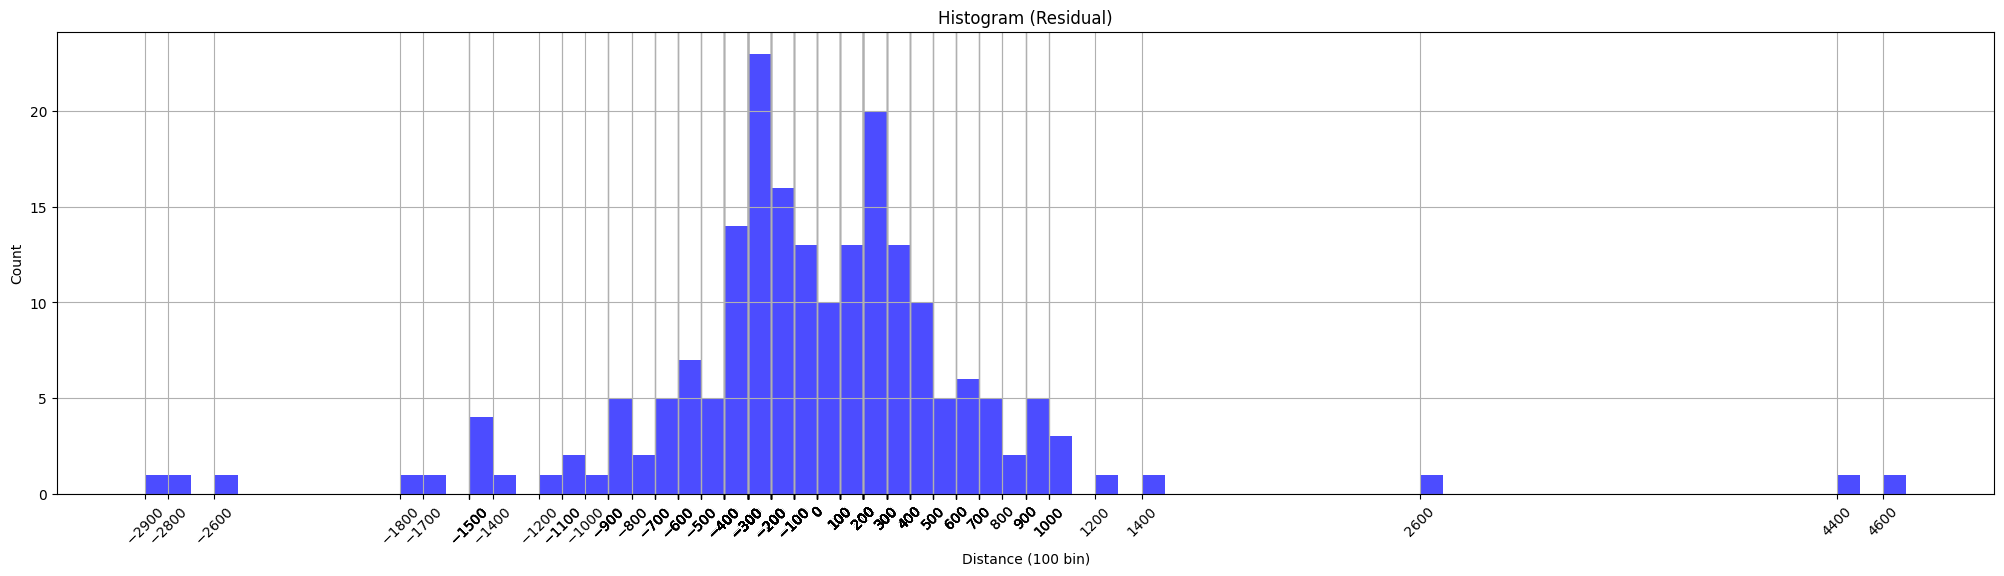

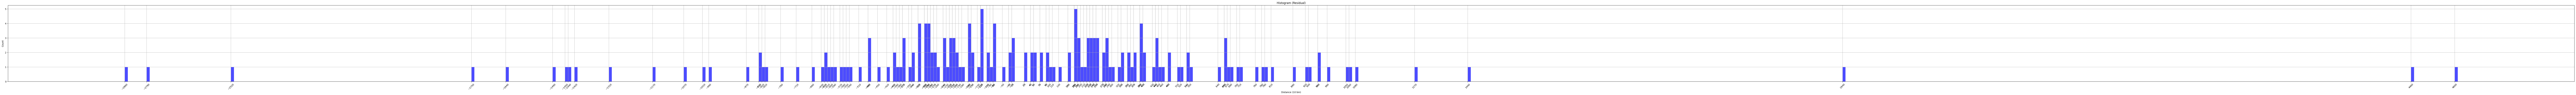

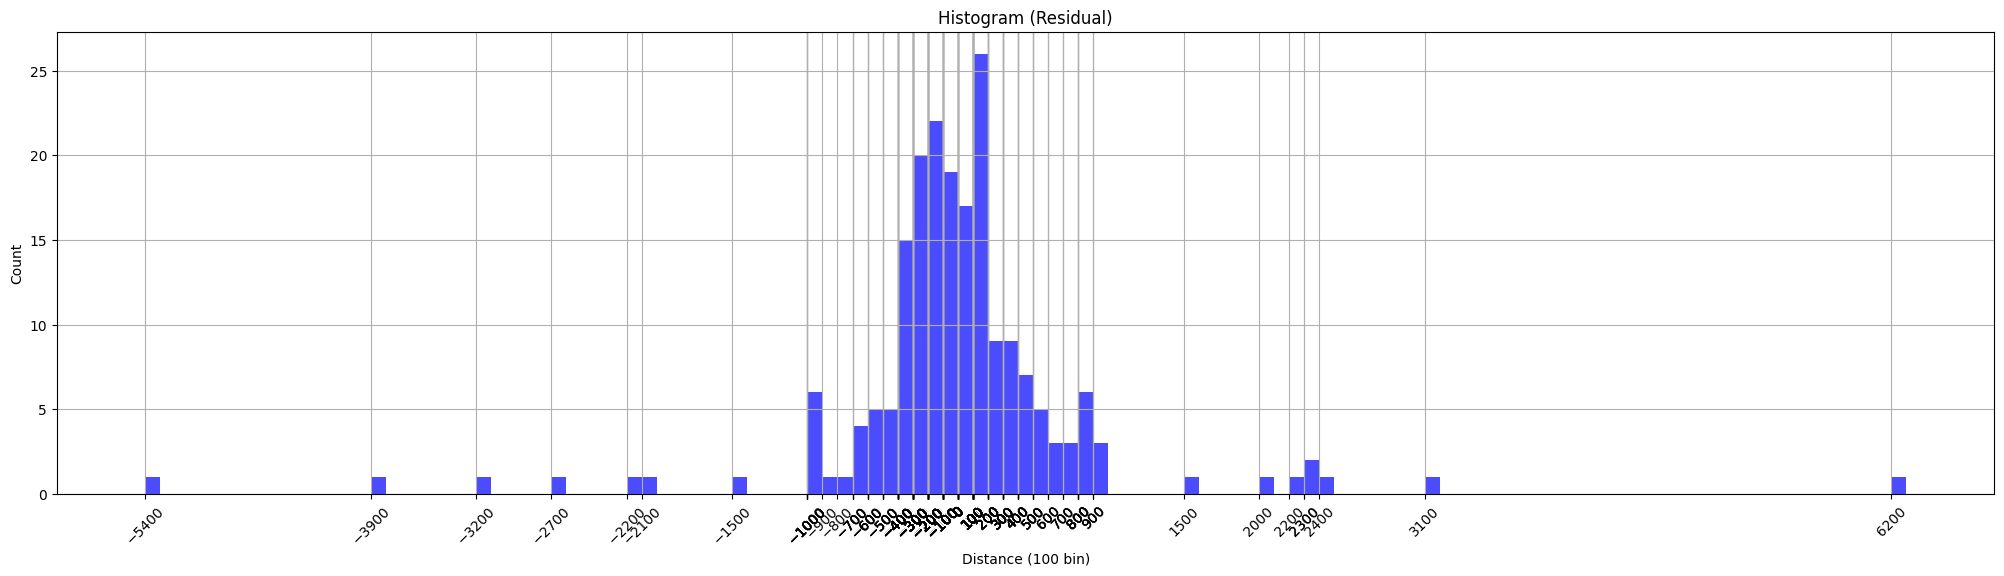

In [137]:
fig10=plt.figure(10)                                             # create new figure for plotting

plt.plot(F_x, V1_residual, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('Residuals from Fit V', fontsize=15)                           # Add the plot title

plt.ylabel(' Residuals', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels

#plt.xlim(4.0, 80.0)                                            # Set the range of the plot's x-axis
#plt.ylim(-2.5, 2.5)                                          # Set the range of the plot's y-axis

#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars
x_lines = np.array([100, 510])
y_lines = np.array([1000.0, 1000.0])
plt.plot(x_lines,0.0*y_lines, 'r-')
plt.plot(x_lines,y_lines, 'r--')
plt.plot(x_lines,-y_lines, 'r--')

fig12=plt.figure(12)                                             # create new figure for plotting

plt.plot(F_x, V1_normalized_residual, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('Normalized Residuals from Fit V', fontsize=15)                           # Add the plot title

plt.ylabel('Normalized Residuals', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('time', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels

#plt.xlim(4.0, 80.0)                                            # Set the range of the plot's x-axis
#plt.ylim(-2.5, 2.5)                                          # Set the range of the plot's y-axis

#plt.errorbar(x_data, y_data, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars
x_lines = np.array([100, 510])
y_lines = np.array([1.0, 1.0])
plt.plot(x_lines,0.0*y_lines, 'r-')
plt.plot(x_lines,y_lines, 'r--')
plt.plot(x_lines,-y_lines, 'r--')
residual_X_V,residual_Y_V=categorize_D(V1_residual)
categorize_D_bin_10(V1_residual)

residual_X_V_2,residual_Y_V_2=categorize_D(V2_residual)

This is the data analysis for V_Residual :
Model parameters:
amplitude_fit =  14.916388654654982 +/- inf
sigma_fit =  -431.3360543339367 +/- inf
background_fit =  1.1627667911671578 +/- inf
center_fit =  -1.6831808510777144e-11 +/- inf
a_s_covariance_error2 = inf
a_b_covariance_error2 = inf
a_c_covariance_error2 = inf
s_b_covariance_error2 = inf
s_c_covariance_error2 = inf
b_c_covariance_error2 = inf
STD: 2.7236456628660974
Fit quality
Reduced Chi^2 = 8.136140441705688


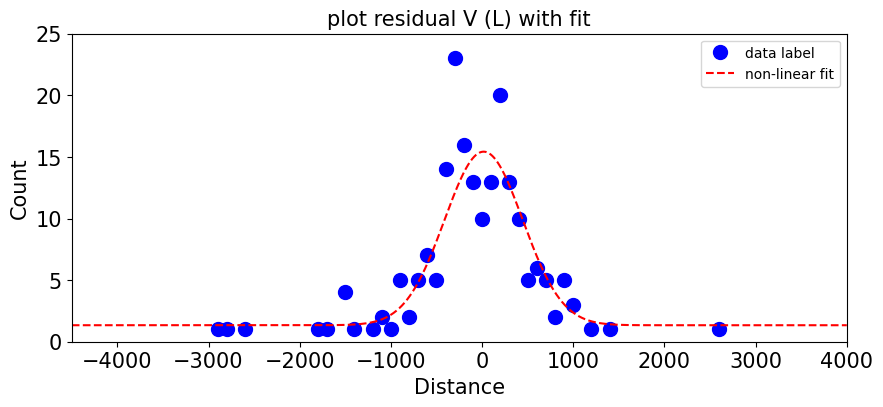

This is the data analysis for V_Residual_2 :
Model parameters:
amplitude_fit =  20.398542583060404 +/- 0.5699875860348604
sigma_fit =  283.9924391666446 +/- 9.844173322199987
background_fit =  1.6428584753457522 +/- 0.22922555929873964
center_fit =  -92.0944556677036 +/- 8.77577596967417
a_s_covariance_error2 = -2.035704869803991
a_b_covariance_error2 = -0.03757364597474403
a_c_covariance_error2 = 0.0013247655674398552
s_b_covariance_error2 = -1.0219362865003037
s_c_covariance_error2 = 0.02801513533123521
b_c_covariance_error2 = -0.0016578022676828539
STD: 2.4110843859508084
Fit quality
Reduced Chi^2 = 6.394660707793366


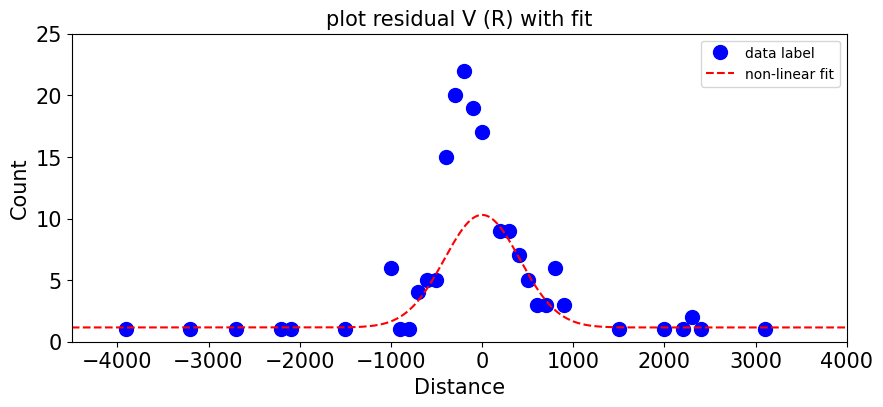

In [138]:
V_Residual=analysis(residual_X_V,residual_Y_V,[20,20,0,0],"V_Residual",None)
V_Residual_a,V_Residual_s,V_Residual_b,V_Residual_c=V_Residual[0],V_Residual[1],V_Residual[2],V_Residual[3]

fig10=plt.figure(10,figsize=(10,4))                                             # create new figure for plotting

plt.plot(residual_X_V,residual_Y_V, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot residual V (L) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Count', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('Distance', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(D_x, D_y, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(-4500,4000,10000)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, H_Residual_a,H_Residual_s,H_Residual_b,H_Residual_c)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(-4500, 4000)                                            # Set the range of the plot's x-axis
plt.ylim(0, 25)
# Add in legend
plt.legend()

plt.show()

V_Residual_2=analysis(residual_X_V_2,residual_Y_V_2,[25,100,0,0],"V_Residual_2",None)
V_Residual_a_2,V_Residual_s_2,V_Residual_b_2,V_Residual_c_2=V_Residual_2[0],V_Residual_2[1],V_Residual_2[2],V_Residual_2[3]

fig10=plt.figure(10,figsize=(10,4))                                             # create new figure for plotting

plt.plot(residual_X_V_2,residual_Y_V_2, 'blue', linestyle='none', marker='o', markerfacecolor='blue', markersize=10, label='data label')  # make the plot with round markers
plt.title('plot residual V (R) with fit', fontsize=15)                           # Add the plot title

plt.ylabel('Count', fontsize=15)                     # Add the y-axis label, "fontsize" is optional
plt.yticks(size=15)                                            # adjust the size of the y-axis tick number labels

plt.xlabel('Distance', fontsize=15)                            # Add the x-axis label, "fontsize" is optional
plt.xticks(size=15)                                            # adjust the size of the x-axis tick number labels


#plt.errorbar(D_x, D_y, y_errorbars, fmt='o', ecolor='green', capsize=5)   # Add error bars

# Generate the points for the fitting curve (linear function in this case)
x_fit = np.linspace(-4500,4000,10000)                    # Generate an ordered array of 100 x-values between -0.3 and 4.3
y_fit = yModel(x_fit, H_Residual_a_2,H_Residual_s_2,H_Residual_b_2,H_Residual_c_2)                  # Generate the y-values for the fitting curve (linear in this case)

plt.plot(x_fit,y_fit, 'r--', label='non-linear fit')                         # Plot the fit as a dashed red line on top of the original plot

plt.xlim(-4500, 4000)                                            # Set the range of the plot's x-axis
plt.ylim(0, 25)
# Add in legend
plt.legend()

plt.show()

In [139]:
# At this point, the actual errorbar has been gained from the gaussian fit of the residual plot (the value of sigma fit)

In [140]:
H1_final=analysis(B_x,B_y,initialParameters_H_1,"H_1_final",[H_Residual_s for _ in range(217)])
B_a_final,B_s_final,B_b_final,B_c_final,Num_1_H_final,Num_1_H_errorbar_final,H1_residual_final,H1_normalized_residual_final=H1_final[0],H1_final[1],H1_final[2],H1_final[3],H1_final[4],H1_final[5],H1_final[6],H1_final[7]
print("")
print("")
print("")

V1_final=analysis(F_x,F_y,initialParameters_V_1,"V_1_final",[V_Residual_s for _ in range(201)])
F_a_final,F_s_final,F_b_final,F_c_final,Num_1_V_final,Num_1_V_errorbar_final,V1_residual_final,V1_normalized_residual_final=V1_final[0],V1_final[1],V1_final[2],V1_final[3],V1_final[4],V1_final[5],V1_final[6],V1_final[7]
print("")
print("")
print("")
H2_final=analysis(D_x,D_y,initialParameters_H_2,"H_2_final",[H_Residual_s_2 for _ in range(137)])
D_a_final,D_s_final,D_b_final,D_c_final,Num_2_H_final,Num_2_H_errorbar_final,H2_residual_final,H2_normalized_residual_final=H2_final[0],H2_final[1],H2_final[2],H2_final[3],H2_final[4],H2_final[5],H2_final[6],H2_final[7]
print("")
print("")
print("")
V2_final=analysis(H_x,H_y,initialParameters_V_2,"V_2_final",[V_Residual_s_2 for _ in range(201)])
H_a_final,H_s_final,H_b_final,H_c_final,Num_2_V_final,Num_2_V_errorbar_final,V2_residual_final,V2_normalized_residual_final=V2_final[0],V2_final[1],V2_final[2],V2_final[3],V2_final[4],V2_final[5],V2_final[6],V2_final[7]

This is the data analysis for H_1_final :
Model parameters:
amplitude_fit =  3244.2473729461285 +/- 124.9329609034708
sigma_fit =  10.367305274289064 +/- 0.47756633038808344
background_fit =  -591.8995585004951 +/- 33.738232663548864
center_fit =  206.86776801834958 +/- 0.45256668300310754
a_s_covariance_error2 = -28.405122265563545
a_b_covariance_error2 = -804.877276573352
a_c_covariance_error2 = 9.58057729636316e-06
s_b_covariance_error2 = -5.144720598101811
s_c_covariance_error2 = -3.080464404012884e-08
b_c_covariance_error2 = -4.150220984513943e-09
STD: 1121.2086590693307
Fit quality
Reduced Chi^2 = 6.918937584346088



This is the data analysis for V_1_final :
Model parameters:
amplitude_fit =  3663.2413035336563 +/- 135.2202809344704
sigma_fit =  8.905579629108146 +/- 0.39198549940520466
background_fit =  -500.5514947519516 +/- 34.79841630173246
center_fit =  337.20690528337354 +/- 0.37327843661304816
a_s_covariance_error2 = -25.71099249545247
a_b_covariance_error2 = -856.2566206

In [141]:
#Ratio analysis   only focus on the left atom currently

#Error analysis   #previous
total_num_errorbar_H=np.sqrt(Num_1_H_errorbar**2+Num_2_H_errorbar**2)
total_num_errorbar_V=np.sqrt(Num_1_V_errorbar**2+Num_2_V_errorbar**2)

total_num_H=Num_1_H+Num_2_H
total_num_V=Num_1_V+Num_2_V

Left_H_ratio=Num_1_H/(Num_1_H+Num_2_H)
Left_V_ratio=Num_1_V/(Num_1_V+Num_2_V)

L_H_errorbar=Left_H_ratio*np.sqrt((Num_1_H_errorbar/Num_1_H)**2+(total_num_errorbar_H/total_num_H)**2)
L_V_errorbar=Left_V_ratio*np.sqrt((Num_1_V_errorbar/Num_1_V)**2+(total_num_errorbar_V/total_num_V)**2)

print("Left atom ratio(H) = "+str(Left_H_ratio)+" ± "+str(L_H_errorbar))
print("Left atom ratio(V) = "+str(Left_V_ratio)+" ± "+str(L_V_errorbar))   #Add covariance will make the errorbar sightly smaller 0.042->0.033



print("")

#final

total_num_errorbar_H_final=np.sqrt(Num_1_H_errorbar_final**2+Num_2_H_errorbar_final**2)
total_num_errorbar_V_final=np.sqrt(Num_1_V_errorbar_final**2+Num_2_V_errorbar_final**2)

total_num_H_final=Num_1_H_final+Num_2_H_final
total_num_V_final=Num_1_V_final+Num_2_V_final

Left_H_ratio_final=Num_1_H_final/(Num_1_H_final+Num_2_H_final)
Left_V_ratio_final=Num_1_V_final/(Num_1_V_final+Num_2_V_final)

L_H_errorbar_final=Left_H_ratio_final*np.sqrt((Num_1_H_errorbar_final/Num_1_H_final)**2+(total_num_errorbar_H_final/total_num_H_final)**2)
L_V_errorbar_final=Left_V_ratio_final*np.sqrt((Num_1_V_errorbar_final/Num_1_V_final)**2+(total_num_errorbar_V_final/total_num_V_final)**2)

print("Left atom ratio(H) final= "+str(Left_H_ratio_final)+" ± "+str(L_H_errorbar_final))
print("Left atom ratio(V) final= "+str(Left_V_ratio_final)+" ± "+str(L_V_errorbar_final))   #Add covariance will make the errorbar sightly smaller

Left atom ratio(H) = 0.4976116413034716 ± 0.029444615653986005
Left atom ratio(V) = 0.5114026737481973 ± 0.020881468472121207

Left atom ratio(H) final= 0.4976116387201 ± 0.01123496766096051
Left atom ratio(V) final= 0.5114026729381179 ± 0.010068764701916788
